In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
#from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold



In [12]:
train = pd.read_csv('Train (1).csv')
test = pd.read_csv('Test (1).csv')


In [13]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [14]:
form_field_cat = {'charge': 1, 'lending': 0}
label = {'yes': 1,'no': 0}

train['default_status'].replace(label, inplace = True)

train['form_field47'].replace(form_field_cat, inplace = True)
test['form_field47'].replace(form_field_cat, inplace = True)

In [15]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,56000.000000,3.511100e+04,55645.000000,4.494400e+04,56000.000000
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,0.368215,6.634511,0.563377,0.072520,0.095371,0.649518,3.052449e+05,1.049061,6.005862e+05,0.244911
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,0.412858,6.378946,0.196973,0.291146,0.335210,0.477125,1.647757e+06,1.806160,5.842405e+06,0.430038
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,0.000000,2.020000,0.411672,0.000000,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02,0.000000
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,0.220000,5.050000,0.588648,0.000000,0.000000,1.000000,3.181243e+02,0.000000,1.703996e-01,0.000000
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,0.628573,10.100000,0.753840,0.000000,0.000000,1.000000,1.153022e+03,1.181754,4.993370e-01,0.000000
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,2.200000,91.910000,0.800000,5.000000,5.000000,1.000000,5.321014e+07,28.000000,2.307571e+08,1.000000


In [16]:
features = train.select_dtypes(exclude = object).columns.drop(['default_status'])

In [17]:
for col in features:
    train[col].fillna(-999, inplace = True)
    test[col].fillna(-999, inplace = True)


In [18]:
train.drop(['form_field49','form_field48'], axis = 1, inplace=True)
test.drop(['form_field49','form_field48'], axis = 1, inplace=True)

In [19]:
category = ['form_field47']

In [20]:
X = train.drop('default_status', axis=1)
y = train['default_status']


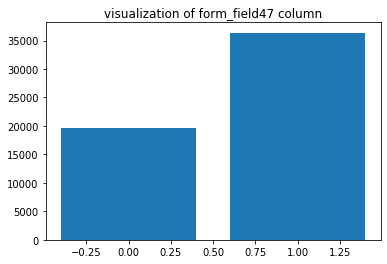

In [21]:
def value_count(data,key):
    data = data[key].value_counts()
    plt.bar(data.keys(), data.values.astype(int))
    plt.title('visualization of '+ key + ' column')
    plt.show()
    return
value_count(train, 'form_field47')

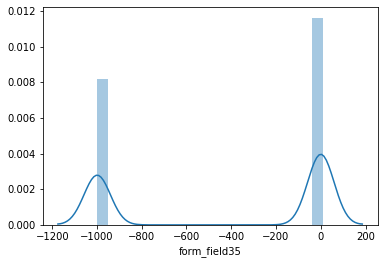

In [22]:
sns.distplot(train['form_field35'])
plt.show()

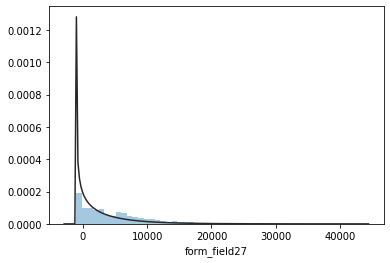

In [23]:
from scipy import stats
sns.distplot(train['form_field27'], kde=False, fit=stats.gamma)
plt.show()

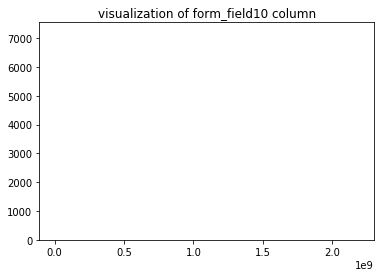

In [24]:
value_count(train, 'form_field10')

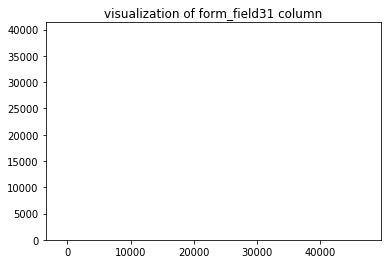

In [25]:
value_count(train, 'form_field31')

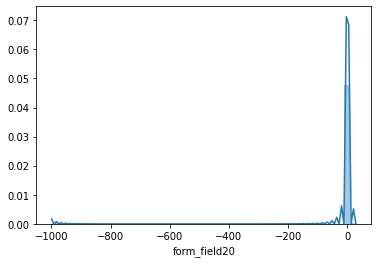

In [26]:
sns.distplot(train['form_field20'])
plt.show()

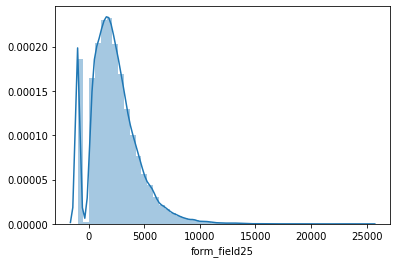

In [27]:
sns.distplot(train['form_field25'])
plt.show()

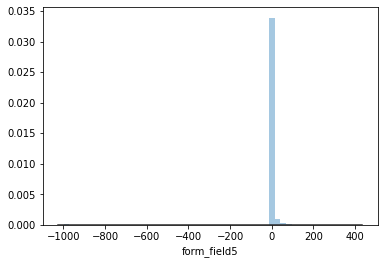

In [28]:
from scipy import stats
sns.distplot(train['form_field5'], kde=False, fit=stats.gamma)
plt.show()

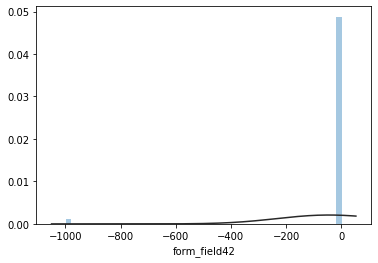

In [29]:
from scipy import stats
sns.distplot(train['form_field42'], kde=False, fit=stats.gamma)
plt.show()

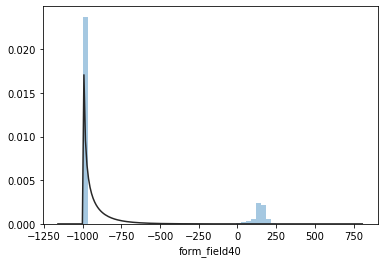

In [30]:
from scipy import stats
sns.distplot(train['form_field40'], kde=False, fit=stats.gamma)
plt.show()

In [ ]:
model = CatBoostClassifier(objective = 'CrossEntropy', learning_rate=0.01, iterations= 4000, 
                         depth= 8, eval_metric = 'AUC', random_seed=2505,use_best_model=True, task_type='GPU',devices='0:1', )

In [ ]:
fold = StratifiedKFold(n_splits = 10, shuffle =True)
pred = []
score =[]
test_res = []


for train_index , test_index in fold.split(X,y):
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    y_train,y_test = y.iloc[train_index], y.iloc[test_index]
   
    cat= cat.fit(X_train, y_train,cat_features=cat_col,eval_set=(X_test, y_test),early_stopping_rounds=200,verbose=True)
    pred_proba_cat = cat.predict_proba(X_test)[:, 1]
    score.append(roc_auc_score(y_test, pred_proba_cat))
    pred_cat = model.predict_proba(test[features])[:,1]
    test_res.append(pred_cat)


In [ ]:
predictions = np.mean(test_res, axis = 0) 

In [ ]:
sub_id = pd.read_csv('Test.csv')
sub_id = sub_id.Applicant_ID.values

final_df = pd.DataFrame()
final_df['Applicant_ID'] = sub_id
final_df['default_status'] = predictions

final_df.to_csv('submission24.csv', index = False)
